# Regresión Lineal con Una Variable

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

data_path = '../data/'

## Cargar y visualizar los datos

El dataset contiene información sobre el precio de varias viviendas en Zaragoza. La primera columna es el tamaño de la vivienda en metros cuadrados y la segunda columna es el precio de la vivienda en miles de euros.

In [2]:
# Load data
data1 = pd.read_csv(data_path + '01_houseprizes1v.csv', delimiter=';')
data1.head()

,Size,Price
0,60,110
1,61,94
2,62,89
3,63,127
4,64,89


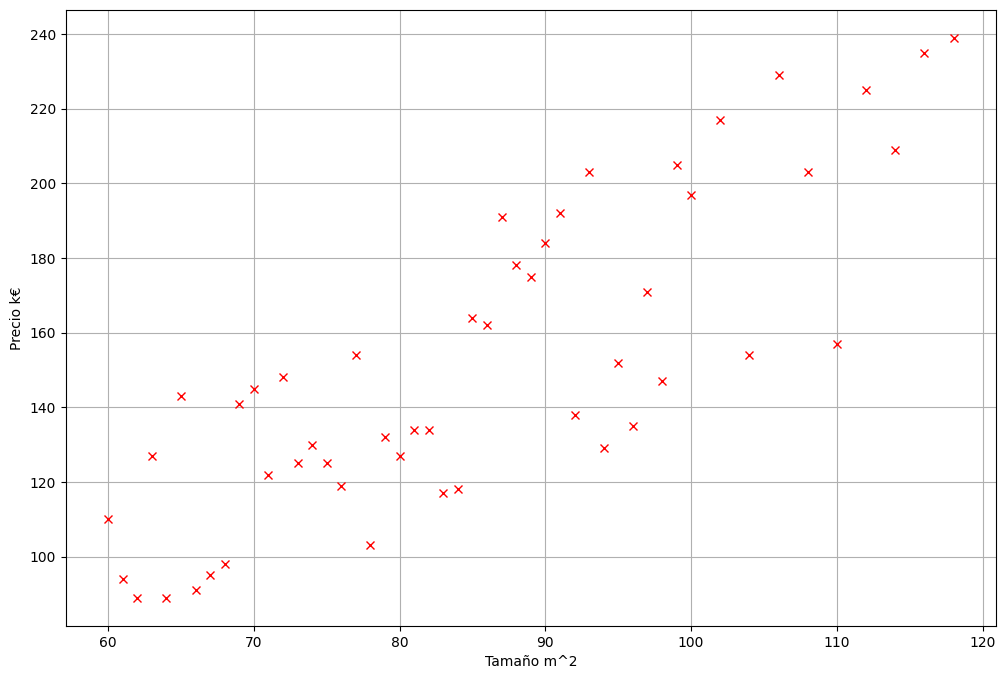

In [3]:
plt.figure(figsize=(12, 8))
plt.xlabel('Tamaño m^2')
plt.ylabel('Precio k€')
plt.grid()
plt.plot(data1.Size, data1.Price, 'rx')

In [4]:
print(f"Data dimensions: {data1.shape}")

Data dimensions: (50, 2)


### Preparar los datos

Vamos a realizar aprendizaje supervisado, nuestros datos se dividirán en:
 - Características (features): son las variables de entrada, en este caso el tamaño de la vivienda.
 - Etiquetas (labels): son las variables de salida, en este caso el precio de la vivienda.

In [5]:
# Separamos los datos en variables independientes (X) y dependientes (y)
X = data1.Size.values
y = data1.Price.values

print(X.shape, y.shape)

(50,) (50,)


In [8]:
# Número de muestras:
m = len(y) 
m

50

## Descenso de gradiente

El descenso de gradiente es un algoritmo de optimización que nos permite encontrar el mínimo de una función. En nuestro caso, la función que queremos minimizar es la función de coste.

Hipótesis: 

$$h_\theta(x) = \theta_0 + \theta_1 x$$

La función de coste es la siguiente:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

Objetivo: encontrar $\theta_0$ y $\theta_1$ que minimicen la función de coste $J(\theta)$.

In [12]:
# Inicializamos los parámetros theta a 0
theta_0 = 0.0
theta_1 = 0.0

# También se podrían inicializar a valores aleatorios
#theta_0 = np.random.rand()
#theta_1 = np.random.rand()

La función de coste se ejecuta muchas veces en el algoritmo, preparamos una función para calcularla:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

In [10]:
# Preparams una función que calcule el coste de la regresión lineal, es decir, la función de coste:
def costFunc(X, y, theta_0, theta_1):
    m = len(y)

    J = 0

    # Calculamos el sumatorio de la función de coste
    for i in range(m):
        #h_x = theta_0 + theta_1*X[i]
        #J += (h_x - y[i])**2

        J += (theta_0 + theta_1*X[i] - y[i])**2

    # Dividimos por 2m
    J = J/(2*m)

    return J

In [13]:
# Calculamos el error inicial dados los parámetros iniciales theta = [0, 0]
J = costFunc(X, y, theta_0, theta_1)
print(f"Coste inicial: {J}")

Coste inicial: 12399.87


### Algoritmo

Realizamos multiples actualizaciones del valor de los parámetros theta de acuerdo a la ecuación del descenso de gradiente:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$$

Necesitamos las derivadas de la función de coste respecto a los parámetros theta:

$$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$$

El cálculo paso a paso para la primera derivada es el siguiente:

$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{\partial}{\partial \theta_0} (\frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2)$

$= \frac{1}{2m} \sum_{i=1}^m \frac{\partial}{\partial \theta_0} ((h_\theta(x^{(i)}) - y^{(i)})^2)$

$= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial}{\partial \theta_0} (h_\theta(x^{(i)}) - y^{(i)})$

$= \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$

El cálculo paso a paso para la segunda derivada es el siguiente:

$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{\partial}{\partial \theta_1} (\frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2)$

$= \frac{1}{2m} \sum_{i=1}^m \frac{\partial}{\partial \theta_1} ((h_\theta(x^{(i)}) - y^{(i)})^2)$

$= \frac{1}{2m} \sum_{i=1}^m 2(h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial}{\partial \theta_1} (h_\theta(x^{(i)}) - y^{(i)})$

$= \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$$

$$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$$


In [15]:
# Definimos la función que implementa el descenso del gradiente
def gradientDescent(X, y, theta_0, theta_1, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for i in range(iterations):
        # Ejemplo desarrollado para el parametro theta_0
        # Cálculo del sumatorio
        #sum_0 = 0
        #for j in range(m):
        #    sum_0 += (theta_0 + theta_1*X[j] - y[j])
        #temp_theta_0 = theta_0 - alpha * (1/m) * sum_0

        temp_theta_0 = theta_0 - alpha * (1/m) * np.sum(theta_0 + theta_1*X - y)
        temp_theta_1 = theta_1 - alpha * (1/m) * np.sum((theta_0 + theta_1*X - y)*X)

        theta_0 = temp_theta_0
        theta_1 = temp_theta_1
        
        J_history[i] = costFunc(X, y, theta_0, theta_1)
        theta_history[i] = [theta_0, theta_1]
        
    return theta_0, theta_1, J_history, theta_history

In [22]:
# Parametros para el descenso del gradiente
alpha = 0.0001
alpha = 0.000001
iterations = 1000

# Inicializamos los parámetros theta a 0 (ya estaba hecho antes)
theta_0 = 0.0
theta_1 = 0.0

# Calculamos los parámetros theta óptimos
theta_0, theta_1, J_history, theta_history = gradientDescent(X, y, theta_0, theta_1, alpha, iterations)

print(f"theta_0: {theta_0}, theta_1: {theta_1}")
print(f"Final J: {J_history[-1]}")

theta_0: 0.019240684774365226, theta_1: 1.7910050445393173
Final J: 282.4921475243472


### Resultados

Text(0, 0.5, 'Cost')

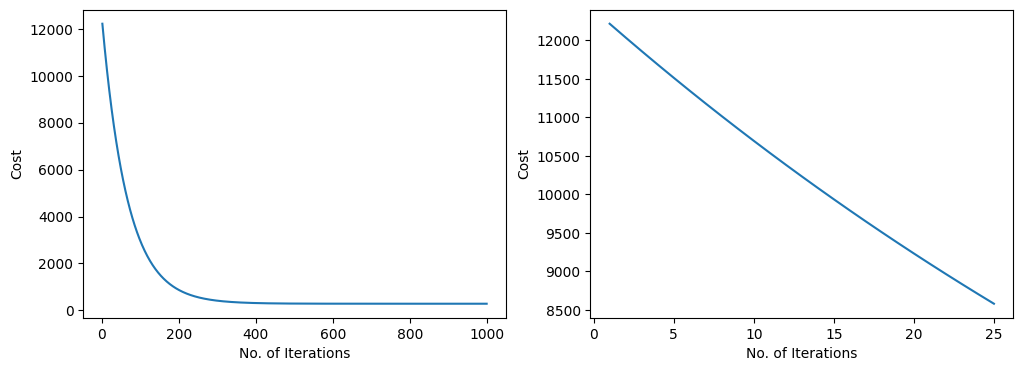

In [23]:
# Plot the previous two graphs next to each other
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(np.arange(1,iterations+1),J_history)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.subplot(122)
plt.plot(np.arange(1,26),J_history[:25])
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')

In [24]:
# Coste final con los parámetros theta óptimos
J_final = costFunc(X, y, theta_0, theta_1)
print(f"Coste final: {J_final}")

# Parametros theta:
print(f"theta_0: {theta_0}, theta_1: {theta_1}")

Coste final: 282.4921475243472
theta_0: 0.019240684774365226, theta_1: 1.7910050445393173


Calculados los parámetros óptimos podemos emplear la hipótesis para predecir el precio de otras viviendas:

$$h_\theta(x) = \theta_0 + \theta_1 x$$

Por comodidad, definimos una función para la misma:

In [25]:
# Función de la hipótesis
def h(x):
    return theta_0 + theta_1*x

In [27]:
# Vivienda de 55 m^2
price_1 = h(55)
print(f"Vivienda de 55 m^2: {h(55)} k€")

# Vivienda de 125 m^2
price_2 = h(125)
print(f"Vivienda de 125 m^2: {h(125)} k€")



Vivienda de 55 m^2: 98.52451813443682 k€
Vivienda de 125 m^2: 223.89487125218903 k€


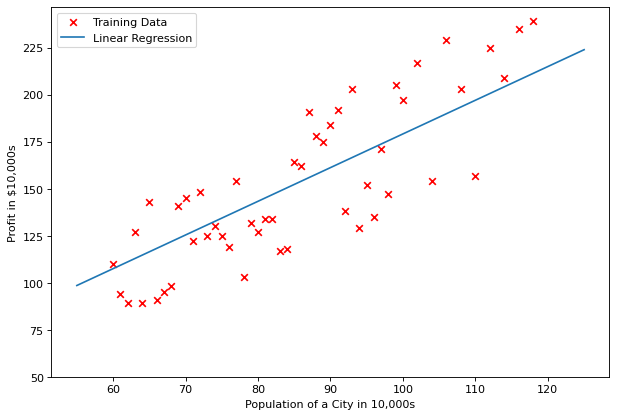

In [28]:
# Plotting the linear regression curve on the scatter plot
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X,y,c='r',marker='x',label = "Training Data")
plt.xlabel('Population of a City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.ylim(ymin=50)
plt.plot([55, 125],[price_1,price_2],label = "Linear Regression")
plt.legend(loc = 'upper left')
plt.show()

# Regresión Lineal con Una Variable (Matrices)

Hipótesis: 

$$h_\theta(x) = \theta_0 + \theta_1 x$$

La función de coste es la siguiente:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

Objetivo: encontrar $\theta_0$ y $\theta_1$ que minimicen la función de coste $J(\theta)$.

### Carga y preparación de los datos

Cargamos de nuevo los datos y los preparamos para el algoritmo:

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

data_path= '../data/'

In [30]:
# Load data
data1 = pd.read_csv(data_path + '01_houseprizes1v.csv', delimiter=';')
print(data1.head())

   Size  Price
0    60    110
1    61     94
2    62     89
3    63    127
4    64     89


In [31]:

print(f"Data dimensions: {data1.shape}")

Data dimensions: (50, 2)


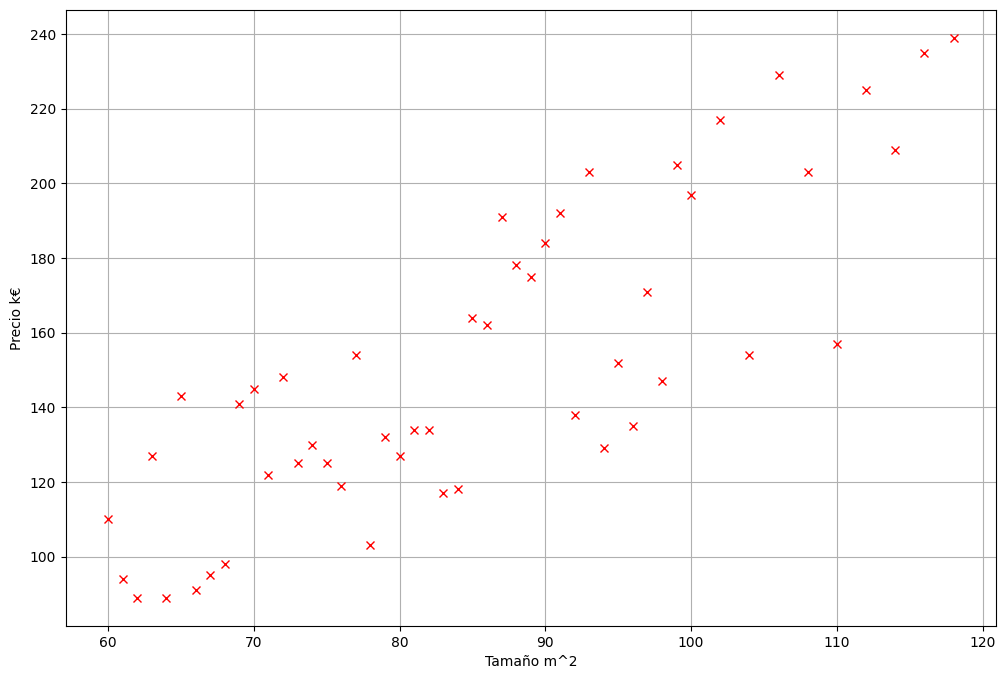

In [32]:
plt.figure(figsize=(12, 8))
plt.xlabel('Tamaño m^2')
plt.ylabel('Precio k€')
plt.grid()
plt.plot(data1.Size, data1.Price, 'rx')


Construimos un vector con nuestros parámetros theta:

$$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}$$

Nos interesa multiplicar este vector de parámetros por los datos de entrada para obtener las prediciones:

$$h_\theta(x) = \theta_0 · 1 + \theta_1 x$$

$$h_\theta(x) = \theta_0 + \theta_1 x = \begin{bmatrix} \theta_0 \ \theta_1 \end{bmatrix} * \begin{bmatrix} 1 \\ x_1 \end{bmatrix} = \theta^T X$$

Para ello X debe tener la siguiente forma:

$$X = \begin{bmatrix} 1 & x^{(1)} \\ 1 & x^{(2)} \\ \vdots & \vdots \\ 1 & x^{(m)} \end{bmatrix}$$

Nuestra hipótesis se puede expresar como:

$$h_\theta(x) = \theta^T X$$



In [34]:
# Initializamos los parámetros theta
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [35]:
# Separamos los datos en variables independientes (X) y dependientes (y)
X = data1.Size.values
y = data1.Price.values
print("Data shapes:", X.shape, y.shape)

print("\n" + "-"*50 + "\n")
# Añadimos una columna de 1s a la matriz X
print("Original x:", X[:5], "\n")
X = np.hstack((np.ones((m,1)),X.reshape(m,1)))
print("Updated X:\n", X[:5,:])

Data shapes: (50,) (50,)

--------------------------------------------------

Original x: [60 61 62 63 64] 

Updated X:
 [[ 1. 60.]
 [ 1. 61.]
 [ 1. 62.]
 [ 1. 63.]
 [ 1. 64.]]


Definimos la función de coste, y calculamos su valor para los parámetros iniciales.

La función de coste se ha definido con diferente notación, pero es la misma que la anterior:

In [36]:
# Cost Function
def cost(X,y,theta):
    m = np.size(y)
    J = (1/(2*m)) * np.sum( np.power(X.dot(theta) - y.reshape(m,1), 2) )
    return J

In [37]:
# Finding the cost with theta intialized to zeros
J = cost(X,y,theta)
print(f"Coste inicial: {J}")

Coste inicial: 12399.87


### Descenso de gradiente

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$$

$$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$$

In [38]:
# Gradient Descent Function
def gradientDescent(X,y,theta,alpha,iterations):
    m = np.size(y)
    J_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))

    theta = np.mat(theta)
    y = np.mat(y).T

    for i in range(iterations):
        temp_theta = theta - alpha * (1/m) * (X.T * (X * theta - y))
        theta = temp_theta
        
        J_history[i] = cost(X,y,theta)
        theta_history[i] = theta.T
        
    return theta, J_history, theta_history


In [39]:
# Parametros para el descenso del gradiente
alpha = 0.00001
#alpha = 0.000001
iterations = 1000
theta = np.zeros((2,1))

# Calculamos los parámetros theta óptimos
theta,J_history,theta_history = gradientDescent(X,y,theta,alpha,iterations)
print(f"theta: {theta}")
theta_final = theta
J_final = J_history[-1]

theta: [[0.00998617]
 [1.7920292 ]]


Text(0, 0.5, 'Cost')

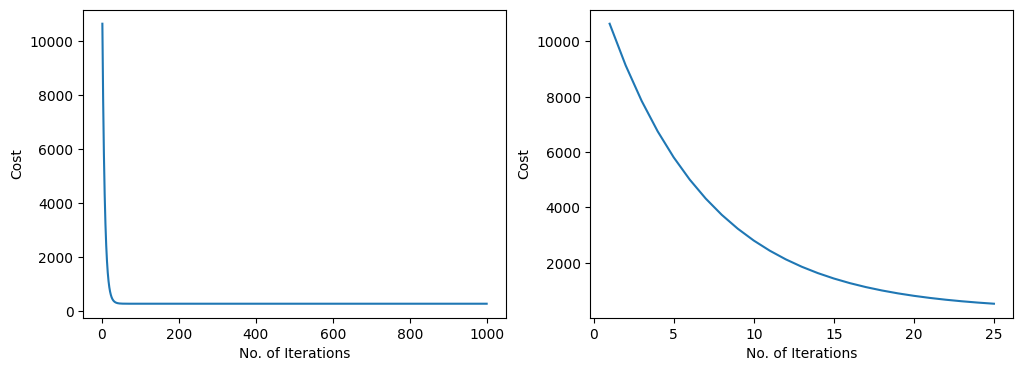

In [40]:
# Plot the previous two graphs next to each other
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(np.arange(1,iterations+1),J_history)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.subplot(122)
plt.plot(np.arange(1,26),J_history[:25])
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')

## Visualización de la función de coste

La función de coste es una función de dos variables, por lo que podemos representarla en 3D.

![Cost Function](../media/01_CostFunction2D.png)


In [41]:
# Intialising the grid over which to call the Cost Function
# Used for plotting surface and contour plots 
theta0_vals = np.linspace(-20,30,100)
theta1_vals = np.linspace(-2,5,100)
xx, yy = np.meshgrid(theta0_vals,theta1_vals,indexing='ij')
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

for (i,j),v in np.ndenumerate(J_vals):
    t = np.array([[xx[i,j]],[yy[i,j]]])
    J_vals[i,j] = cost(X,y,t)

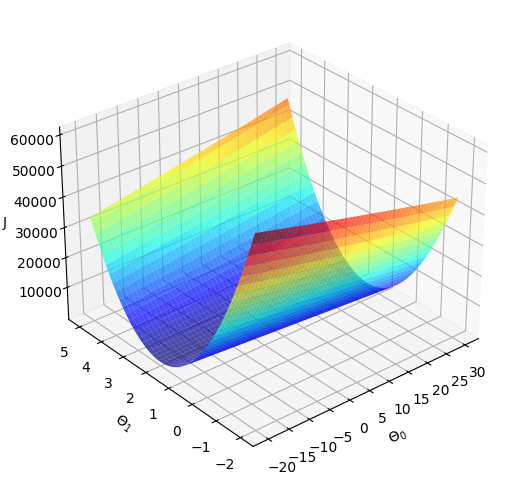

In [42]:
# 3-D Surface plot of the Cost Function 
fig = plt.figure(figsize=(9,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,J_vals,alpha =0.7,cmap=cm.jet)
ax.view_init(azim=230)
ax.xaxis.set_ticks(np.arange(theta0_vals.min(),theta0_vals.max()+1,5))

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('J')
plt.show()

In [315]:
print(theta_history)

# theta_0 & theta_1: 1 out of 100 iterations
theta_0 = theta_history[::10,0]
theta_1 = theta_history[::10,1]

print(theta_0.shape, theta_1.shape)

[[1.52020000e-03 1.35228000e-01]
 [2.92490009e-03 2.60250938e-01]
 [4.22281654e-03 3.75838945e-01]
 ...
 [1.00067599e-02 1.79202897e+00]
 [9.99646713e-03 1.79202908e+00]
 [9.98617432e-03 1.79202920e+00]]
(100,) (100,)


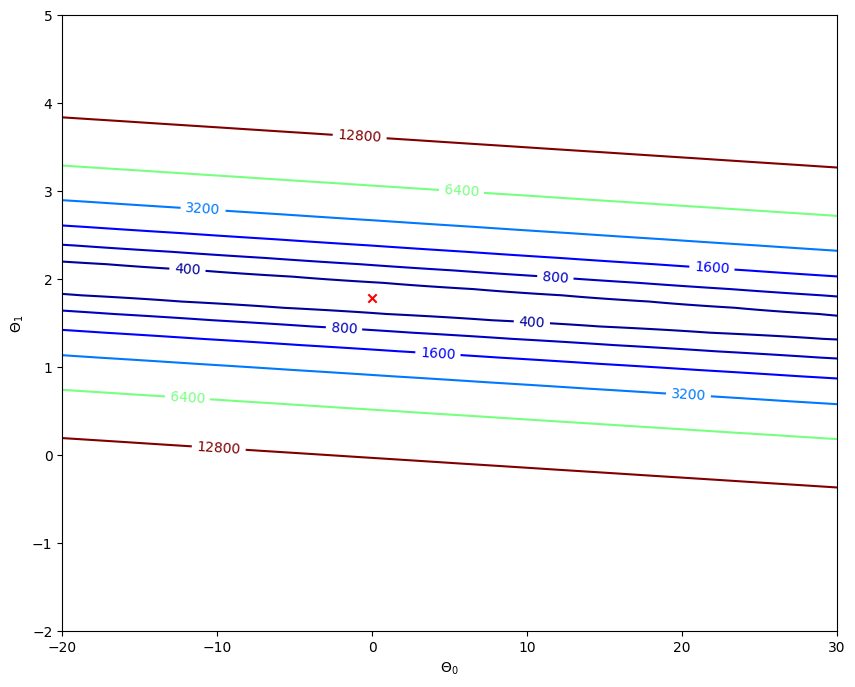

In [43]:
levels = [100]
for i in range(7):
    levels.append(2*levels[i])

# Plotting the contour plot with the gradient descent path
plt.figure(figsize=(10,8),dpi=100)
CS = plt.contour(xx,yy,J_vals,levels, cmap=cm.jet)

plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(theta_0,theta_1,marker = 'x',c = 'r')
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.show()

# Regresión Lineal con varias variables

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

data_path= '../data/'

### Cargar y visualizar los datos

El dataset contiene información sobre el precio de varias viviendas en Zaragoza. La primera columna es el tamaño de la vivienda en metros cuadrados, la segunda columna es el número de habitaciones y la tercera columna es el precio de la vivienda en miles de euros.

In [45]:
# Load data
data1 = pd.read_csv(data_path + '01_houseprizes2v.csv', delimiter=';')
data1.head()

,Size,Dorms,Price
0,98,3,200
1,74,3,165
2,111,3,185
3,66,2,116
4,139,4,270


In [46]:
print(f"Data dimensions: {data1.shape}")

Data dimensions: (47, 3)


In [47]:
# Separamos los datos en variables independientes (X) y dependientes (y), datos y etiquetas
X = data1.iloc[:,0:2].values
y = data1.iloc[:,2].values

print(X.shape, y.shape)

# Número de muestras:
m = len(y)


(47, 2) (47,)


### Normalización de los datos

En nuestro caso los metros cuadrados están en el rango de 50 a 150 y el número de habitaciones en el rango de 1 a 5.

Al tener características con diferentes escalas es necesario normalizar los datos para que el descenso de gradiente funcione correctamente.

In [48]:
# Calculamos media y desviación estándar de los datos para normalizarlos
mu = np.mean(X,axis=0)
sigma = np.std(X,axis=0)

print(f"Media: {mu}")
print(f"Desviación estándar: {sigma}")

Media: [92.89361702  3.17021277]
Desviación estándar: [36.53050841  0.75284281]


Conocidas la media y la desviación típica, definimos una función para normalizar los datos con la siguiente fórmula:

$$x_i = \frac{x_i - \mu_i}{\sigma_i}$$

In [49]:
# Feature Normalization
def fnormalize(X,mu,sigma):
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        temp_X = X[:,i]
        temp_X = (temp_X-mu[i])/sigma[i]
        X_norm[:,i]=temp_X
    return X_norm

In [50]:
X_norm = fnormalize(X,mu,sigma)

### Hipótesis

En esta ocasión tenemos mas de una variable predictora, por lo que la añadimos a la hipótesis junto con un nuevo parámetro theta:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

Y nuestro vector de parámetros theta es:

$$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix}$$

### Función de coste

La función de coste en su forma genérica sigue siendo la misma:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

In [51]:
# First 5 rows of the normalized X
print(X_norm[:5,:])
print()

# Adding a columns of ones to normalized X
X_norm = np.hstack((np.ones((m,1)),X_norm))

# First 5 rows of the normalized X with ones added
print(X_norm[:5,:])


[[ 0.13978407 -0.22609337]
 [-0.51720104 -0.22609337]
 [ 0.495651   -0.22609337]
 [-0.73619608 -1.5543919 ]
 [ 1.26213362  1.10220517]]

[[ 1.          0.13978407 -0.22609337]
 [ 1.         -0.51720104 -0.22609337]
 [ 1.          0.495651   -0.22609337]
 [ 1.         -0.73619608 -1.5543919 ]
 [ 1.          1.26213362  1.10220517]]


In [52]:
# Intializing our parameter vector theta to zeros
theta = np.zeros((X_norm.shape[1],1))
theta

array([[0.],
       [0.],
       [0.]])

In [53]:
# Cost Function
def costFunction(X,y,theta):
    m = np.size(y)
    J = (1/(2*m)) * np.sum( np.power(X.dot(theta) - y.reshape(m,1), 2) )
    return J

In [54]:
# Finding the cost with theta intialized to zeros
J = costFunction(X_norm,y,theta)
print(f"Coste inicial: {J}")

Coste inicial: 16414.521276595744


### Descenso de gradiente

In [55]:
# Gradient Descent Function
def gradientDescent(X,y,theta,alpha,iters):
    theta = np.mat(theta);
    m = np.size(y)
    J_history = np.zeros(iters)
    theta_history = np.zeros((iters,3))

    J_history[0] = costFunction(X,y,theta)
    theta_history[0,:] = theta.T

    y = np.mat(y).T

    for i in range(1,iters):
        temp_theta = theta - (alpha / m) * (X.T * (X * theta - y))
        theta = temp_theta
        J_history[i] = cost(X,y,theta)
        theta_history[i] = theta.T
        
    return theta, J_history, theta_history

In [58]:
# Gradient Descent Settings
#alpha = 0.01
alpha = 0.001
#alpha = 0.0001
#alpha = 0.00001
num_iters = 1000

# Getting the optimum parameters using gradient descent
final_theta, J_history, theta_history = gradientDescent(X_norm,y,theta,alpha,num_iters)
print(f"Theta final: {final_theta}")
print(f"Coste final: {J_history[-1]}")

Theta final: [[1.69260303]
 [0.52603319]
 [0.27069309]]
Coste final: 16092.709054720262


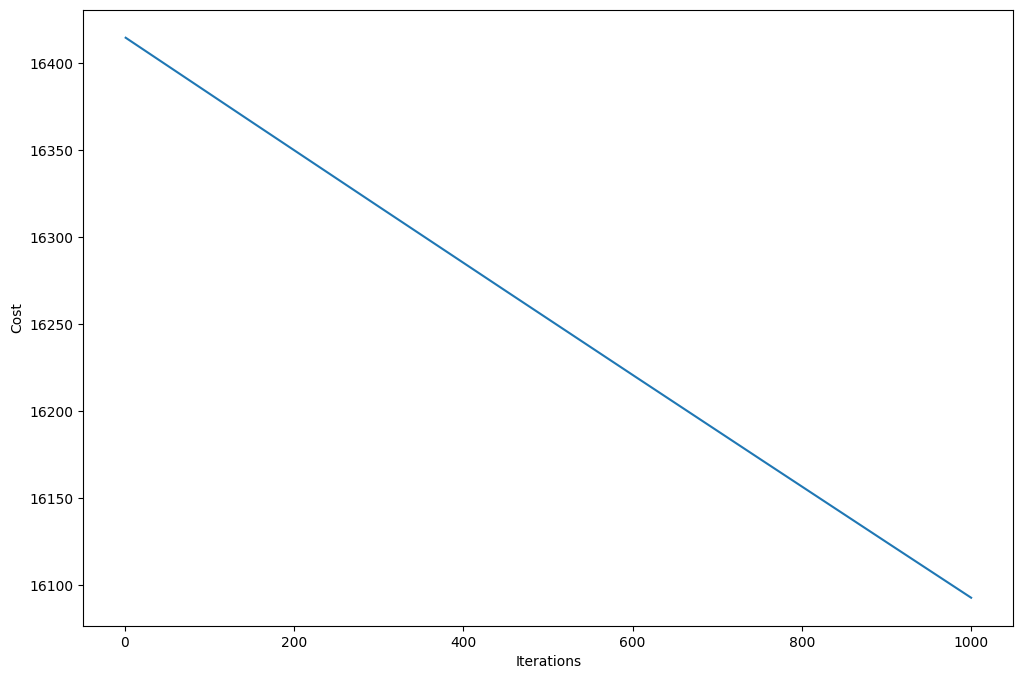

In [59]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(np.arange(1,num_iters+1),J_history)
plt.show()


In [331]:
# Cost at optimum theta
J_final = costFunction(X_norm,y,final_theta)
J_final

509.4209479987255

Utilizamos los parámetros calculados para predecir/estimar el precio de una vivienda de 200 metros cuadrados y 5 habitaciones:

In [332]:
# Función de la hipótesis
def h(x1, x2):
    return final_theta[0] + final_theta[1]*x1 + final_theta[2]*x2

In [333]:
# Normalización de features
def normalize_features(x1, x2):
    return (x1-mu[0])/sigma[0], (x2-mu[1])/sigma[1]

In [334]:
# Price Prediction of a 200 m2, 5 bedroom house

# Pre processing the features
x_pred_norm = normalize_features(200,5)

# Actual Prediction
price = h(x_pred_norm[0], x_pred_norm[1])
print("Predicted price of a 200 m^2, 5 bedrooms house:\n €",price)

Predicted price of a 200 m^2, 5 bedrooms house:
 € [[322.8312985]]


## Visualización de la función de coste

In [335]:
# Intialising the grid over which to call the Cost Function
# Used for plotting surface and contour plots 
theta0_vals = np.linspace(-20,30,100)
theta1_vals = np.linspace(-2,5,100)
xx, yy = np.meshgrid(theta0_vals,theta1_vals,indexing='ij')
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

for (i,j),v in np.ndenumerate(J_vals):
    t = np.array([[xx[i,j]],[yy[i,j]]])
    J_vals[i,j] = cost(X,y,t)

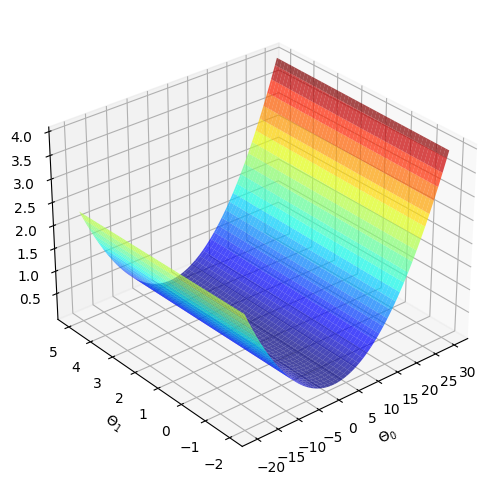

In [336]:
# 3-D Surface plot of the Cost Function 
fig = plt.figure(figsize=(9,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,J_vals,alpha =0.7,cmap=cm.jet)
ax.view_init(azim=230)
ax.xaxis.set_ticks(np.arange(theta0_vals.min(),theta0_vals.max()+1,5))

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('J')
plt.show()

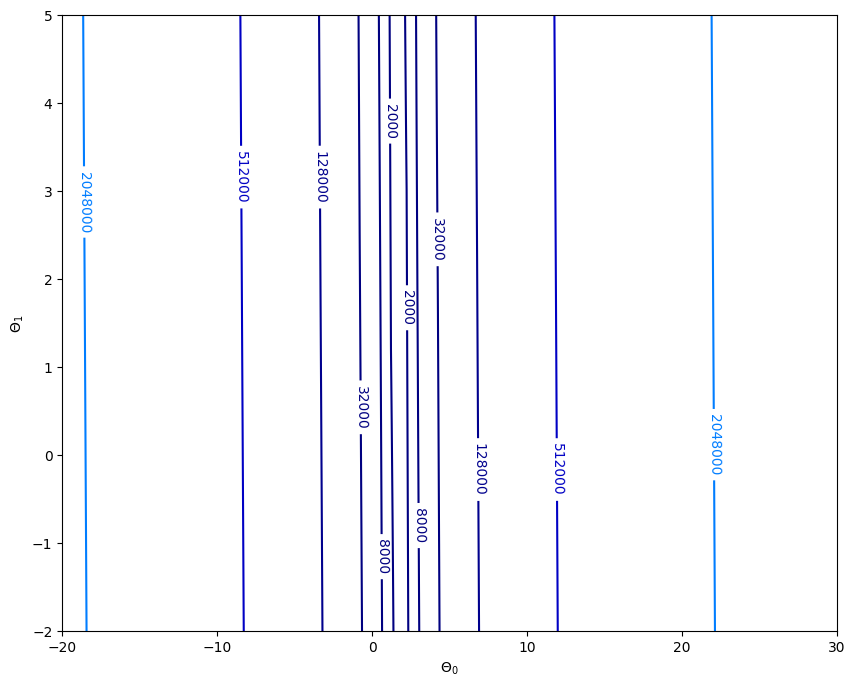

In [337]:
# theta_0 & theta_1: 1 out of 100 iterations
theta_0 = theta_history[::100,0]
theta_1 = theta_history[::100,1]

levels = [500]
for i in range(7):
    levels.append(4*levels[i])

# Plotting the contour plot with the gradient descent path
plt.figure(figsize=(10,8),dpi=100)
CS = plt.contour(xx,yy,J_vals,levels, cmap=cm.jet)

plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.show()